## LONG SHORT TERM MEMORY FOR TSM STOCK

In [1]:
# Importing all the required packages and libraries

import math
from math import sqrt
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score
from keras.layers import Dense, Activation

import sys
import warnings

if not sys.warnoptions:
    warnings.simplefilter("ignore")

In [2]:
#Fetching data for TSM Stock for 10 years

df = web.DataReader('TSM', data_source='yahoo', start='2012-09-30', end='2022-09-30') 
df.head(10)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-10-01,15.940000,15.700000,15.730000,15.900000,19411300.0,11.899861
2012-10-02,16.059999,15.860000,15.980000,16.000000,17701800.0,11.974704
2012-10-03,16.049999,15.820000,16.040001,16.049999,13156700.0,12.012122
2012-10-04,16.170000,16.000000,16.040001,16.160000,15213900.0,12.094449
2012-10-05,16.309999,16.030001,16.160000,16.070000,10687600.0,12.027092
2012-10-08,15.840000,15.480000,15.840000,15.530000,12827100.0,11.622946
2012-10-09,15.450000,15.240000,15.430000,15.360000,9900400.0,11.495714
2012-10-10,15.390000,15.110000,15.320000,15.120000,10169200.0,11.316093
2012-10-11,15.240000,15.000000,15.190000,15.030000,8288900.0,11.248735


In [3]:
print(df.shape)

(2517, 6)


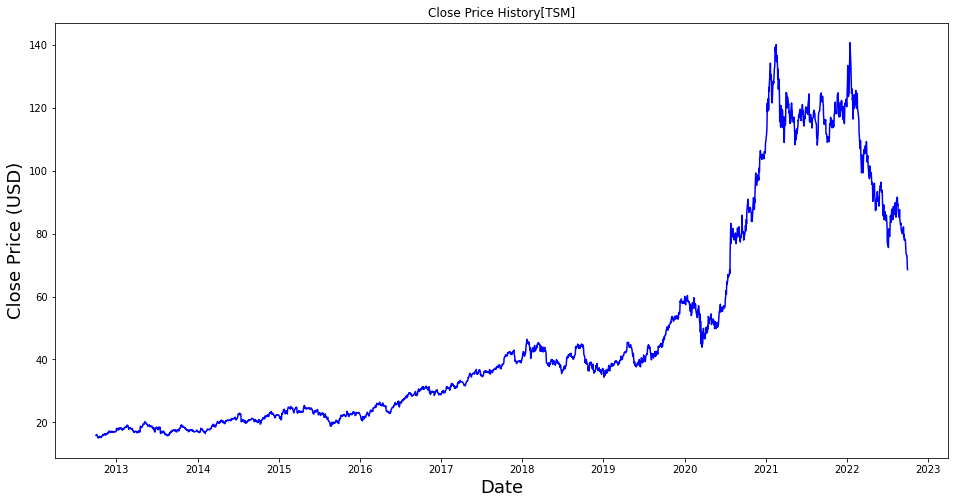

In [4]:
# Visualize the closing price history for TSM stock

plt.figure(figsize=(16,8))
plt.title('Close Price History[TSM]')
plt.plot(df['Close'], color='b')
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price (USD)',fontsize=18)
plt.show()

In [5]:
# Create a new dataframe with only the 'Close' column.
data = df.filter(['Close'])

# Converting the dataframe to a numpy array.
dataset = data.values

# Compute the number of rows to train the model on.

training_data_len = math.ceil( len(dataset) *.8)

In [6]:
# Min-Max Normalization.
scaler = MinMaxScaler(feature_range=(0, 1)) 
scaled_data = scaler.fit_transform(dataset)

In [7]:
# Create the scaled training dataset.
train_data = scaled_data[0:training_data_len, :]

# Split the data into X_train and y_train data sets
X_train=[]
y_train = []

for i in range(60,len(train_data)):
    X_train.append(train_data[i-60:i,0])
    y_train.append(train_data[i,0])

In [8]:
# Convert x_train and y_train to numpy arrays.
X_train, y_train = np.array(X_train), np.array(y_train)

In [9]:
# Reshape the data into the shape accepted by the LSTM.
X_train = np.reshape(X_train, (X_train.shape[0],X_train.shape[1],1))

In [10]:
# Build the LSTM network model.
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1],1)))
model.add(LSTM(units=25, return_sequences=False))
model.add(Activation('linear'))
model.add(Dense(units=1))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 60, 50)            10400     
                                                                 
 lstm_1 (LSTM)               (None, 25)                7600      
                                                                 
 activation (Activation)     (None, 25)                0         
                                                                 
 dense (Dense)               (None, 1)                 26        
                                                                 
Total params: 18,026
Trainable params: 18,026
Non-trainable params: 0
_________________________________________________________________


In [11]:
# Compile the model.
model.compile(optimizer='adam', loss='mean_squared_error')

In [12]:
# Train the model.
model.fit(X_train, y_train, batch_size=1, epochs=10)

Epoch 1/10
1954/1954 [==============================] - 33s 16ms/step - loss: 2.9958e-04
Epoch 2/10
1954/1954 [==============================] - 31s 16ms/step - loss: 1.3549e-04
Epoch 3/10
1954/1954 [==============================] - 31s 16ms/step - loss: 1.2584e-04
Epoch 4/10
1954/1954 [==============================] - 31s 16ms/step - loss: 1.0845e-04
Epoch 5/10
1954/1954 [==============================] - 31s 16ms/step - loss: 8.7097e-05
Epoch 6/10
1954/1954 [==============================] - 31s 16ms/step - loss: 9.0007e-05
Epoch 7/10
1954/1954 [==============================] - 31s 16ms/step - loss: 8.7861e-05
Epoch 8/10
1954/1954 [==============================] - 31s 16ms/step - loss: 7.9369e-05
Epoch 9/10
1954/1954 [==============================] - 31s 16ms/step - loss: 8.5189e-05
Epoch 10/10
1954/1954 [==============================] - 31s 16ms/step - loss: 6.8633e-05


In [13]:
# Test dataset.
test_data = scaled_data[training_data_len-60:, :]

# Create the x_test and y_test datasets.
X_test = []
y_test =  dataset[training_data_len:, :]
for i in range(60,len(test_data)):
    X_test.append(test_data[i-60:i, 0])

In [14]:
# Convert x_test to a numpy array.
X_test = np.array(X_test)

In [15]:
# Reshape the data into the shape accepted by the LSTM.
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [16]:
# Getting the models predicted price values.
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions) #Undo scaling

16/16 [==============================] - 1s 9ms/step


In [17]:
# Calculate/Get the value of RMSE.
rmse = np.sqrt(np.mean(((predictions- y_test)**2)))
mse = mean_squared_error(predictions,y_test)
rmse_new = sqrt(mse)
r = r2_score(predictions,y_test)

In [21]:
# print('RMSE = {}',rmse)
print('R-Squared Score = {} '.format(r))

R-Squared Score = 0.831464077449926 


In [22]:
# Plot/Create the data for the graph.
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions

R-Squared Score = {} 0.831464077449926


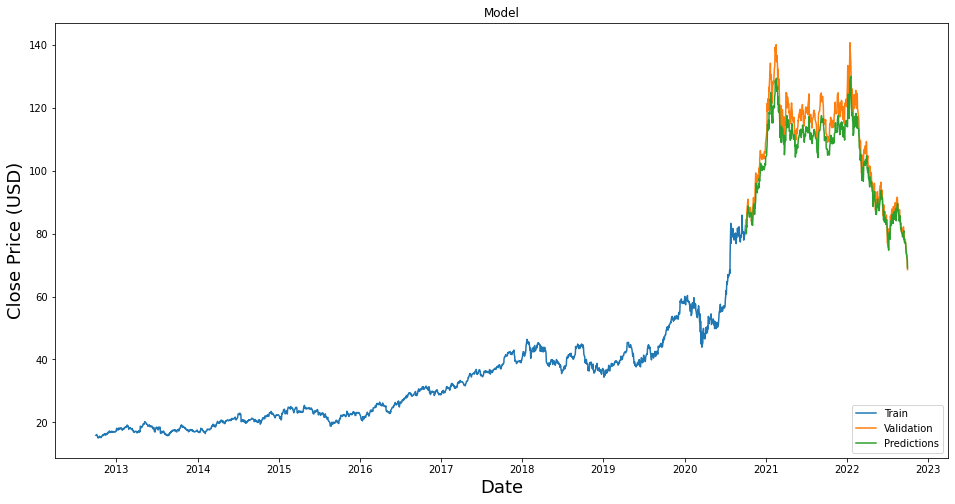

In [24]:
# Visualize the data.
print('R-Squared Score = {}',r)
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price (USD)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Validation', 'Predictions'], loc='lower right')
plt.show()

In [25]:
valid

,Close,Predictions
Date,,
2020-10-02,80.800003,81.252052
2020-10-05,84.540001,79.952194
2020-10-06,83.120003,82.727692
2020-10-07,86.919998,82.025002
2020-10-08,87.800003,84.945602
...,...,...
2022-09-26,73.010002,73.346352
2022-09-27,73.029999,72.372398
2022-09-28,72.129997,72.269753
